In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from itertools import chain
from collections import Counter
import string
import random
from itertools import islice
import json


import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from transformers import pipeline
import pickle

### Define Functions

In [26]:
class keyword_analysis:
    
    def __init__(self, data):
        self.data = data
        
    def passages(self, user):
        if user == 'all':
            temp_df = self.data
        else:
            temp_df = self.data[self.data['Name'] == user]
            
        flattened_passages = list(chain.from_iterable(temp_df['Passages']))
    
        return len(flattened_passages), flattened_passages
        
    def generate_freq(self, corpus):
        translator = str.maketrans("","" , string.punctuation)
        corpus_processed = corpus.translate(translator)
        
        unigrams_temp = [word.lower() for word in nltk.word_tokenize(corpus_processed)]
        
        bigrams = list(ngrams(unigrams_temp, 2))
        bigram_freq = dict(Counter(bigrams))
        
        stop_words = set(stopwords.words('english'))
        unigrams = [word for word in unigrams_temp if word not in stop_words]
        unigram_freq = dict(Counter(unigrams))
        
        sorted_unigrams = dict(sorted(unigram_freq.items(), key=lambda item: item[1],reverse=True))
        sorted_bigrams = dict(sorted(bigram_freq.items(), key=lambda item: item[1], reverse=True))
        
        return sorted_unigrams, sorted_bigrams
    
    def run_analysis(self, user, anti_words):
    
        user_passages = self.passages(user)[1]
        corpus = ' '.join(user_passages)

        frequencies = self.generate_freq(corpus)
        unigrams = frequencies[0]
        bigrams = frequencies[1]

        neg_word = {word: unigrams.get(word, 0) for word in anti_words.keys()}

    
        return unigrams, bigrams, neg_word

    def plot_analysis(self, user, neg_word):
        plt.figure(figsize=(12, 8))
        plt.bar(neg_word.keys(), neg_word.values())
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.title('Top 10 Antipathy Words')
        plt.xticks(rotation='vertical')
        plt.show()
        
        filename = 'Email/' + str(user) + '_antiwords.png'
        plt.savefig(filename)

### Top antipathy words

In [3]:
email_data = pd.read_pickle('Email/emails_data_processed.pkl')
email_data

,Name,Subject,Date,Body,Passages
44038,Team Ronchetti,CAMPAIGN COUNTDOWN: EIGHT DAYS,2022-10-31,"This election is just 8 days away, and WE NEED...","[This election is just 8 days away, and WE NEE..."
44042,John Fetterman,I’m not taking a single day off,2022-10-30,"Look, my team might not approve, but I’ll just...","[Look, my team might not approve, but I’ll jus..."
44127,Sara Jacobs,I’m asking one last time,2022-10-31,I know you’re probably getting a lot of emails...,[I know you’re probably getting a lot of email...
44130,Adam Schiff,hey,2022-10-31,[ ]AdamSchiff for Congress Hey Derek — I hope...,[[ ]AdamSchiff for Congress Hey Derek — I hop...
44134,Brad Pfaff,This is the most important deadline of the race,2022-10-31,"Hi there, I just got word from my Finance Dire...","[Hi there, I just got word from my Finance Dir..."
...,...,...,...,...,...
186607,Justices Gorsuch and Kavanaugh LIED to the Ame...,5X match to hold Republicans accountable,2022-08-03,"Team, Representatives Ted Lieu and Alexandria ...","[Team, Representatives Ted Lieu and Alexandria..."
186608,Dan Goldman,A new playbook in Congress,2022-09-19,"Today marks 50 days until Election Day, Peter....","[Today marks 50 days until Election Day, Peter..."
186609,Team Beshear,Andy's opponents are threatening to undo our p...,2022-09-21,FIRST: It was reported that former disgraced g...,[FIRST: It was reported that former disgraced ...
186611,Tom Malinowski,thank you for keeping up this fight,2022-08-21,͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ...,[͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏...


In [4]:
users =  list(email_data['Name'].unique())
len(users)

12989

In [27]:
analysis_class = keyword_analysis(email_data)

In [6]:
antipathy_words = {'hate': 0, 'resent':0, 'dislike':0, 'despise':0, 'detest':0, 'loathe':0,
                   'abhor':0, 'deride':0, 'disparage':0, 'hostile':0}

In [23]:
final_users =[user for user in users if analysis_class.passages(user)[0] > 100]

In [28]:
all_neg_words = {}
for user in final_users:
    uni, bi, neg_words = analysis_class.run_analysis(user, antipathy_words)
    all_neg_words[user] = neg_words

In [51]:
antipathy_df.to_pickle('Email/email-antipathy-analysis.pkl')

In [29]:
antipathy_df = pd.DataFrame(columns=final_users)
antipathy_df['Words'] = antipathy_words
for user in final_users:
    antipathy_df[user] = all_neg_words[user].values()

In [30]:
antipathy_df = antipathy_df.drop( columns=['Words'])
top_antipathy_df = antipathy_df.sort_values(by='hate', axis=1, ascending=False).T[:10]
top_antipathy_df

,hate,resent,dislike,despise,detest,loathe,abhor,deride,disparage,hostile
Herschel Walker,1217,0,0,6,0,0,0,0,0,0
Nancy Pelosi,364,0,0,0,0,0,0,0,0,0
Tyler Kistner,160,0,0,0,0,0,0,0,0,0
LTC Allen West,96,0,0,0,0,0,0,0,0,0
Ron Johnson,81,0,0,0,0,0,0,0,0,0
George Logan,75,0,0,0,0,0,0,0,0,0
Catalina Lauf,71,0,0,0,0,0,0,0,0,0
Team Schrier,66,0,0,0,0,0,0,0,0,0
Cicely Davis,60,0,12,0,0,0,0,0,0,0
Herschel,59,0,0,0,0,0,0,0,0,0


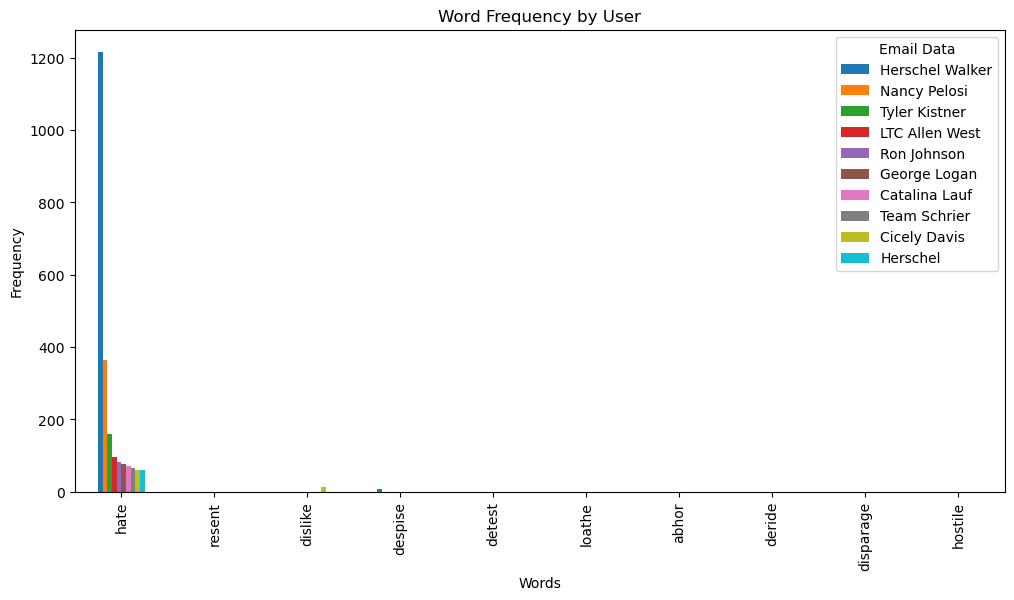

In [31]:
# Create the bar plot
ax = top_antipathy_df.T.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency by User')
plt.legend(title='Email Data', loc='upper right')

# Display the plot
plt.show()

In [37]:
hate_analysis = top_antipathy_df['hate'][:10]

<BarContainer object of 10 artists>

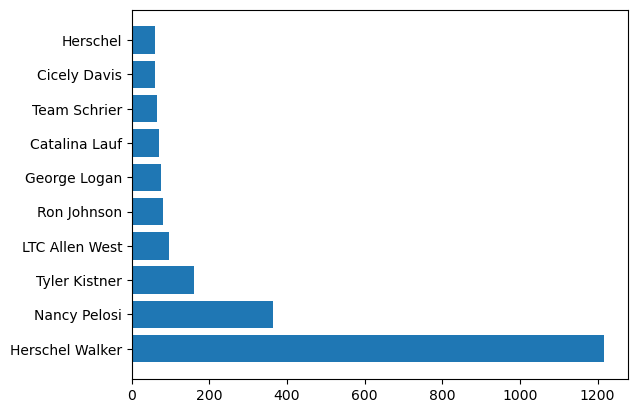

In [39]:
plt.barh(hate_analysis.index, hate_analysis.values)

### Context words analysis

In [40]:
unigrams, bigrams, negwords = analysis_class.run_analysis('all', antipathy_words)

In [46]:
emails_uni_bi_neg = {'unigrams': unigrams, 'bigrams':bigrams, 'negwords': negwords}

In [48]:
with open('Email/emails_uni_bi_neg.pkl', "wb") as file:
    pickle.dump(emails_uni_bi_neg, file)

In [41]:
def context_word_frequencies(bigrams, target_word):
    before_words = {}
    after_words = {}

    for bigram, frequency in bigrams.items():
        if bigram[0] == target_word:
            after_words[bigram[1]] = after_words.get(bigram[1], 0) + frequency
        elif bigram[1] == target_word:
            before_words[bigram[0]] = before_words.get(bigram[0], 0) + frequency

    sorted_before_words = dict(sorted(before_words.items(), key=lambda item: item[1], reverse=True))
    sorted_after_words = dict(sorted(after_words.items(), key=lambda item: item[1], reverse=True))
    
    size = 20
    if len(sorted_before_words.items()) < 20 or len(sorted_after_words.items()) <20:
        size = min(len(sorted_before_words.items()), len(sorted_after_words.items()))
    
    top_before_words = dict(islice(sorted_before_words.items(), size))
    top_after_words = dict(islice(sorted_after_words.items(), size))
    
    return top_before_words, top_after_words, size

In [42]:
def create_context_word_dataframe(bigrams, target_word):
    before_words, after_words, size = context_word_frequencies(bigrams, target_word)
    context_words = pd.DataFrame(columns=['Before_Words', 'B_Count', 'Target_Word', 
                                          'After_Words', 'A_Count'])
    context_words['Before_Words'] = before_words.keys()
    context_words['B_Count'] = before_words.values()
    context_words['After_Words'] = after_words.keys()
    context_words['A_Count'] = after_words.values()
    context_words['Target_Word'] = [target_word for i in range(size)]
    
    return context_words

In [43]:
target_word = 'hate'

In [44]:
context_words_df_email = create_context_word_dataframe(bigrams, target_word)
context_words_df_email

,Before_Words,B_Count,Target_Word,After_Words,A_Count
0,we,2790,hate,to,4105
1,wed,751,hate,tosee,205
2,i,641,hate,and,131
3,emailswe,203,hate,asking,126
4,who,123,hate,america,65
5,they,97,hate,that,52
6,and,57,hate,crimes,47
7,donate,54,hate,–,47
8,to,52,hate,our,39
9,d,49,hate,americain,34
